#online

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# We open the main file to analyse what the data are and how they are sorted
bc_df = pd.read_csv('MAIN_EN_Berlin_bike_thief_file_for_analysis.csv')
bc_df.head()

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-12-01,1,12,2022,2022-12-01,8,2022-12-01,8,1300836,506,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest
1,2022-12-01,1,12,2022,2022-11-29,22,2022-11-30,17,1300732,718,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße
2,2022-12-01,1,12,2022,2022-05-28,7,2022-05-28,14,6300526,569,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
3,2022-12-01,1,12,2022,2022-11-21,9,2022-11-21,16,1100309,600,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße
4,2022-12-01,1,12,2022,2022-11-30,16,2022-12-01,11,3701659,400,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße


In [112]:
lor_df = pd.read_csv('Berlin_LOR_code.csv')
#lor_df2 = pd.read_csv('Berlin_LOR_code2_enc.csv')
lor_df

,Berlin_code_area;Administrative_district;District;Quarter;Street_name
0,1100101;Mitte;Zentrum;Tiergarten Süd;Stülerstraße
1,1100102;Mitte;Zentrum;Tiergarten Süd;Großer Ti...
2,1100103;Mitte;Zentrum;Tiergarten Süd;Lützowstraße
3,1100104;Mitte;Zentrum;Tiergarten Süd;Körnerstraße
4,1100205;Mitte;Zentrum;Regierungsviertel;Wilhel...
...,...
537,12601032;Reinickendorf;Märkisches Viertel;Roll...
538,12601133;Reinickendorf;Märkisches Viertel;MV N...
539,12601134;Reinickendorf;Märkisches Viertel;MV N...
540,12601235;Reinickendorf;Märkisches Viertel;MV S...


In [80]:
lor_df2_enc = pd.read_csv('Berlin_LOR_code2.csv', encoding='latin-1')
lor_df2_enc.to_csv('Berlin_LOR_code2_en.csv', index=False)

In [83]:
lor_df2_enc = pd.read_csv('Berlin_LOR_code2_en.csv', encoding='utf-8')
lor_df2_enc.to_csv('Berlin_LOR_code2_enCSV.csv', index=False)

In [124]:
lor_df2_enc = pd.read_csv('Final_Lor_Berlin.numbers')
lor_df2_enc

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 10: invalid start byte

In [123]:
print(len(lor_df.columns))

1


In [115]:
# to avoid any issue by reading the german special character we encode it to 'latin-1' to change them, and then re-encode it 'utf-8'
bc2_df = pd.read_csv('Fahrraddiebstahl_U.csv', encoding='latin-1')
bc2_df.to_csv('TEST ENCODE.csv', index=False)

In [116]:
bcUpd_df = pd.read_csv('TEST ENCODE.csv', encoding='utf-8')
bcUpd_df.to_csv('Fahrraddiebstahl_Final.csv', index=False)

# Standardizing

We start by unifying the date in the european format

In [117]:
bc_df['Record_date'] = pd.to_datetime(bc_df['Record_date'])
bc_df['Stealing_date'] = pd.to_datetime(bc_df['Stealing_date'])
bc_df['Report_stealing_date'] = pd.to_datetime(bc_df['Report_stealing_date'])

bc_df.head()

,Record_date,Record_day,Record_month,Record_year,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-12-01,1,12,2022,2022-12-01,8,2022-12-01,8,1300836,506,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest
1,2022-12-01,1,12,2022,2022-11-29,22,2022-11-30,17,1300732,718,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße
2,2022-12-01,1,12,2022,2022-05-28,7,2022-05-28,14,6300526,569,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
3,2022-12-01,1,12,2022,2022-11-21,9,2022-11-21,16,1100309,600,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße
4,2022-12-01,1,12,2022,2022-11-30,16,2022-12-01,11,3701659,400,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße


In [118]:
bcUpd_df['ANGELEGT_AM'] = pd.to_datetime(bcUpd_df['ANGELEGT_AM'])
bcUpd_df['TATZEIT_ANFANG_DATUM'] = pd.to_datetime(bcUpd_df['TATZEIT_ANFANG_DATUM'])
bcUpd_df['TATZEIT_ENDE_DATUM'] = pd.to_datetime(bcUpd_df['TATZEIT_ENDE_DATUM'])

/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '31.01.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '30.01.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '29.01.2023' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '28.01.2023

We now unify the columns of "Fahrraddiebstahl_U.csv" which is the updated records to be then concatenate to the main file "bc_df".

By looking at the columns of both files we will adapt to the main file column which is bc_df.

Green column : original data provided by the berliner police department<br />
Blue column : addition for date precision<br />


Creating a separate file to implemente the updates
To make our final file clearer and more agile, we drop the following columns : <br />
'Record_day', 'Record_month', 'Record_year'

In [121]:
bc_df_final = bc_df[['Record_date',
       'Stealing_date', 'Stealing_hour', 'Report_stealing_date',
       'Report_stealing_hour', 'Berlin_code_area', 'Bike_value',
       'Unsuccesful_attempt', 'Bike_type', 'Crime_type', 'Crime_reason',
       'Administrative_district', 'District', 'Quarter', 'Street_name']].copy()

We enriche the dates and time by the months and years to add more futur filtering possibilities :


In [122]:
# using function pd.DatetimeIndex to extract the month and the year from a date.
bc_df_final["stealing_month"] = pd.DatetimeIndex(bc_df_final['Stealing_date']).month
bc_df_final["stealing_year"] = pd.DatetimeIndex(bc_df_final['Stealing_date']).year
bc_df_final["Stealing_day"] = pd.DatetimeIndex(bc_df_final['Stealing_date']).day
bc_df_final.head()

,Record_date,Stealing_date,Stealing_hour,Report_stealing_date,Report_stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name,stealing_month,stealing_year,Stealing_day
0,2022-12-01,2022-12-01,8,2022-12-01,8,1300836,506,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest,12,2022,1
1,2022-12-01,2022-11-29,22,2022-11-30,17,1300732,718,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße,11,2022,29
2,2022-12-01,2022-05-28,7,2022-05-28,14,6300526,569,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte,5,2022,28
3,2022-12-01,2022-11-21,9,2022-11-21,16,1100309,600,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße,11,2022,21
4,2022-12-01,2022-11-30,16,2022-12-01,11,3701659,400,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße,11,2022,30


**Translation**<br />
We rename and translate the column and their value in english 

In [50]:
bcUpd_df.columns

Index(['ANGELEGT_AM', 'TATZEIT_ANFANG_DATUM', 'TATZEIT_ANFANG_STUNDE',
       'TATZEIT_ENDE_DATUM', 'TATZEIT_ENDE_STUNDE', 'LOR', 'SCHADENSHOEHE',
       'VERSUCH', 'ART_DES_FAHRRADS', 'DELIKT', 'ERFASSUNGSGRUND'],
      dtype='object')

In [51]:
bc_df_final['Bike_type'].unique()

array(['Bike', 'Child', 'Men', 'Mountain', 'Racing', 'Women', 'Cargo'],
      dtype=object)

In [52]:
bcUpd_df['Unsuccesful_attempt'] = bcUpd_df['Unsuccesful_attempt'].replace('Nein', "No")
bcUpd_df['Unsuccesful_attempt'] = bcUpd_df['Unsuccesful_attempt'].replace('Ja', "Yes")
bcUpd_df['Unsuccesful_attempt'] = bcUpd_df['Unsuccesful_attempt'].replace('Unbekannt', "Unknown")

KeyError: 'Unsuccesful_attempt'

In [53]:
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Mountainbike', "Mountain")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Fahrrad', "Bike")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Herrenfahrrad', "Men")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Damenfahrrad', "Women")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Rennrad', "Racing")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('diverse Fahrräder', "Multiple bikes")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Kinderfahrrad', "Child")
bcUpd_df['Bike_type'] = bcUpd_df['Bike_type'].replace('Lastenfahrrad', "Cargo")

KeyError: 'Bike_type'

In [54]:
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Keller- und Bodeneinbruch', "Break-in")
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Fahrraddiebstahl', "Theft")

KeyError: 'Crime_type'

In [55]:
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Keller- und Bodeneinbruch', "Break-in")
bcUpd_df['Crime_type'] = bcUpd_df['Crime_type'].replace('Fahrraddiebstahl', "Theft")

KeyError: 'Crime_type'

In [56]:
bcUpd_df.rename(columns={'ANGELEGT_AM': 'Record_date', 'TATZEIT_ANFANG_DATUM': 'Report_stealing_date', 'TATZEIT_ANFANG_STUNDE': 'Report_stealing_hour', 'TATZEIT_ENDE_DATUM': 'Stealing_date', 'TATZEIT_ENDE_STUNDE': 'Stealing_hour', 'LOR': 'Berlin_code_area', 'SCHADENSHOEHE': 'Bike_value', 'VERSUCH': 'Unsuccesful_attempt', 'ART_DES_FAHRRADS': 'Bike_type', 'DELIKT': 'Crime_type', 'ERFASSUNGSGRUND': 'Crime_reason'}, inplace=True)
bcUpd_df.head()

,Record_date,Report_stealing_date,Report_stealing_hour,Stealing_date,Stealing_hour,Berlin_code_area,Bike_value,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason
0,2023-05-02,2023-05-02,8,2023-05-02,8,11200514,0,Nein,Mountainbike,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
1,2023-05-02,2023-04-02,10,2023-04-02,11,1300730,372,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,2023-05-02,2023-05-02,6,2023-05-02,9,6300632,749,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
3,2023-05-02,2023-04-02,12,2023-05-02,8,12100205,350,Nein,Herrenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...
4,2023-05-02,2023-04-02,16,2023-05-02,13,2500728,1500,Nein,Damenfahrrad,Keller- und Bodeneinbruch,Sonstiger schwerer Diebstahl in/aus Keller/Bod...


#We add the geographical columns
on = the pivot column
#join
lor_df

In [39]:
#bc_df_final.merge(lor_df, left_on='Berlin_code_area', right_on=["Administrative_district", "District", "Quarter", "Street_name"])

#bc_merge = bc_df_final.merge(bc_df_final, lor_df, on='Berlin_code_area', how='left')
bc_merge2 = bc_df_final.merge(bc_df_final, lor_df, on='Berlin_code_area')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

We now adapt the date format of Record_date from bcUpd_df to fit with the bc_df_final one.
And we precise the dates and time<br />
- Record_day/Record_month/Record_year<br />
- Stealing_month	Stealing_year

In [ ]:
bcUpd_df["stealing_month"] = pd.DatetimeIndex(bcUpd_df['Stealing_date']).month
bcUpd_df["stealing_year"] = pd.DatetimeIndex(bcUpd_df['Stealing_date']).year
bcUpd_df["stealing_day"] = pd.DatetimeIndex(bcUpd_df['Stealing_date']).day
bcUpd_df.head()

We remove the record older than the update (2022-12-01)

In [ ]:
bcUpd_df = bcUpd_df[~(bcUpd_df['Record_date'] < '2022-12-01')]

In [ ]:
bcUpd_df.columns

In [105]:
#int(bc_df_final['Record_day'])
import math

math.trunc(bc_df_final['Record_day']) 

TypeError: type Series doesn't define __trunc__ method

The data now fits in terms of name and date. We can concatenate both files :

In [92]:
bc_df_final = pd.concat([bc_df_final,bcUpd_df], axis=0)
# We save it to a final .CSV file
bc_df_final.to_csv("Final.csv",index=False)

In [ ]:
bc_df_final.reindex()

In [93]:
num_data = bc_df_final.select_dtypes(include=['int', 'float']).columns
num_data = bc_df_final[num_data]
num_data

,Record_day,Record_month,Record_year,Stealing_hour,Report_stealing_hour,Berlin_code_area,Bike_value,stealing_month,stealing_year,Stealing_day
0,1.0,12.0,2022.0,8,8,1300836,506,12.0,2022.0,1.0
1,1.0,12.0,2022.0,22,17,1300732,718,11.0,2022.0,29.0
2,1.0,12.0,2022.0,7,14,6300526,569,5.0,2022.0,28.0
3,1.0,12.0,2022.0,9,16,1100309,600,11.0,2022.0,21.0
4,1.0,12.0,2022.0,16,11,3701659,400,11.0,2022.0,30.0
...,...,...,...,...,...,...,...,...,...,...
23954,NaN,NaN,NaN,18,19,9501940,449,NaN,NaN,NaN
23955,NaN,NaN,NaN,20,20,1300730,150,NaN,NaN,NaN
23956,NaN,NaN,NaN,14,14,3601142,1000,NaN,NaN,NaN
23957,NaN,NaN,NaN,19,16,2400623,1754,NaN,NaN,NaN


In [94]:
cat_data = bc_df_final.select_dtypes(include=['object']).columns
cat_data = bc_df_final[cat_data]
cat_data

,Record_date,Stealing_date,Report_stealing_date,Unsuccesful_attempt,Bike_type,Crime_type,Crime_reason,Administrative_district,District,Quarter,Street_name
0,2022-12-01,2022-12-01,2022-12-01,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Brunnenstraße Nord,Humboldthain Nordwest
1,2022-12-01,2022-11-29,2022-11-30,No,Bike,Theft,Aggravated theft,Mitte,Gesundbrunnen,Osloer Straße,Soldiner Straße
2,2022-12-01,2022-05-28,2022-05-28,No,Child,Theft,Aggravated theft,Steglitz-Zehlendorf,Zehlendorf Süd/Lichterfelde West,Teltower Damm,Zehlendorf Mitte
3,2022-12-01,2022-11-21,2022-11-21,No,Child,Theft,Aggravated theft,Mitte,Zentrum,Alexanderplatz,Oranienburger Straße
4,2022-12-01,2022-11-30,2022-12-01,No,Men,Theft,Aggravated theft,Pankow,Südlicher Prenzlauer Berg,Prenzlauer Berg Süd,Immanuelkirchstraße
...,...,...,...,...,...,...,...,...,...,...,...
23954,2022-02-01 00:00:00,2022-02-01 00:00:00,2022-01-01 00:00:00,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN
23955,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN
23956,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN
23957,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,NaN,NaN,NaN,NaN


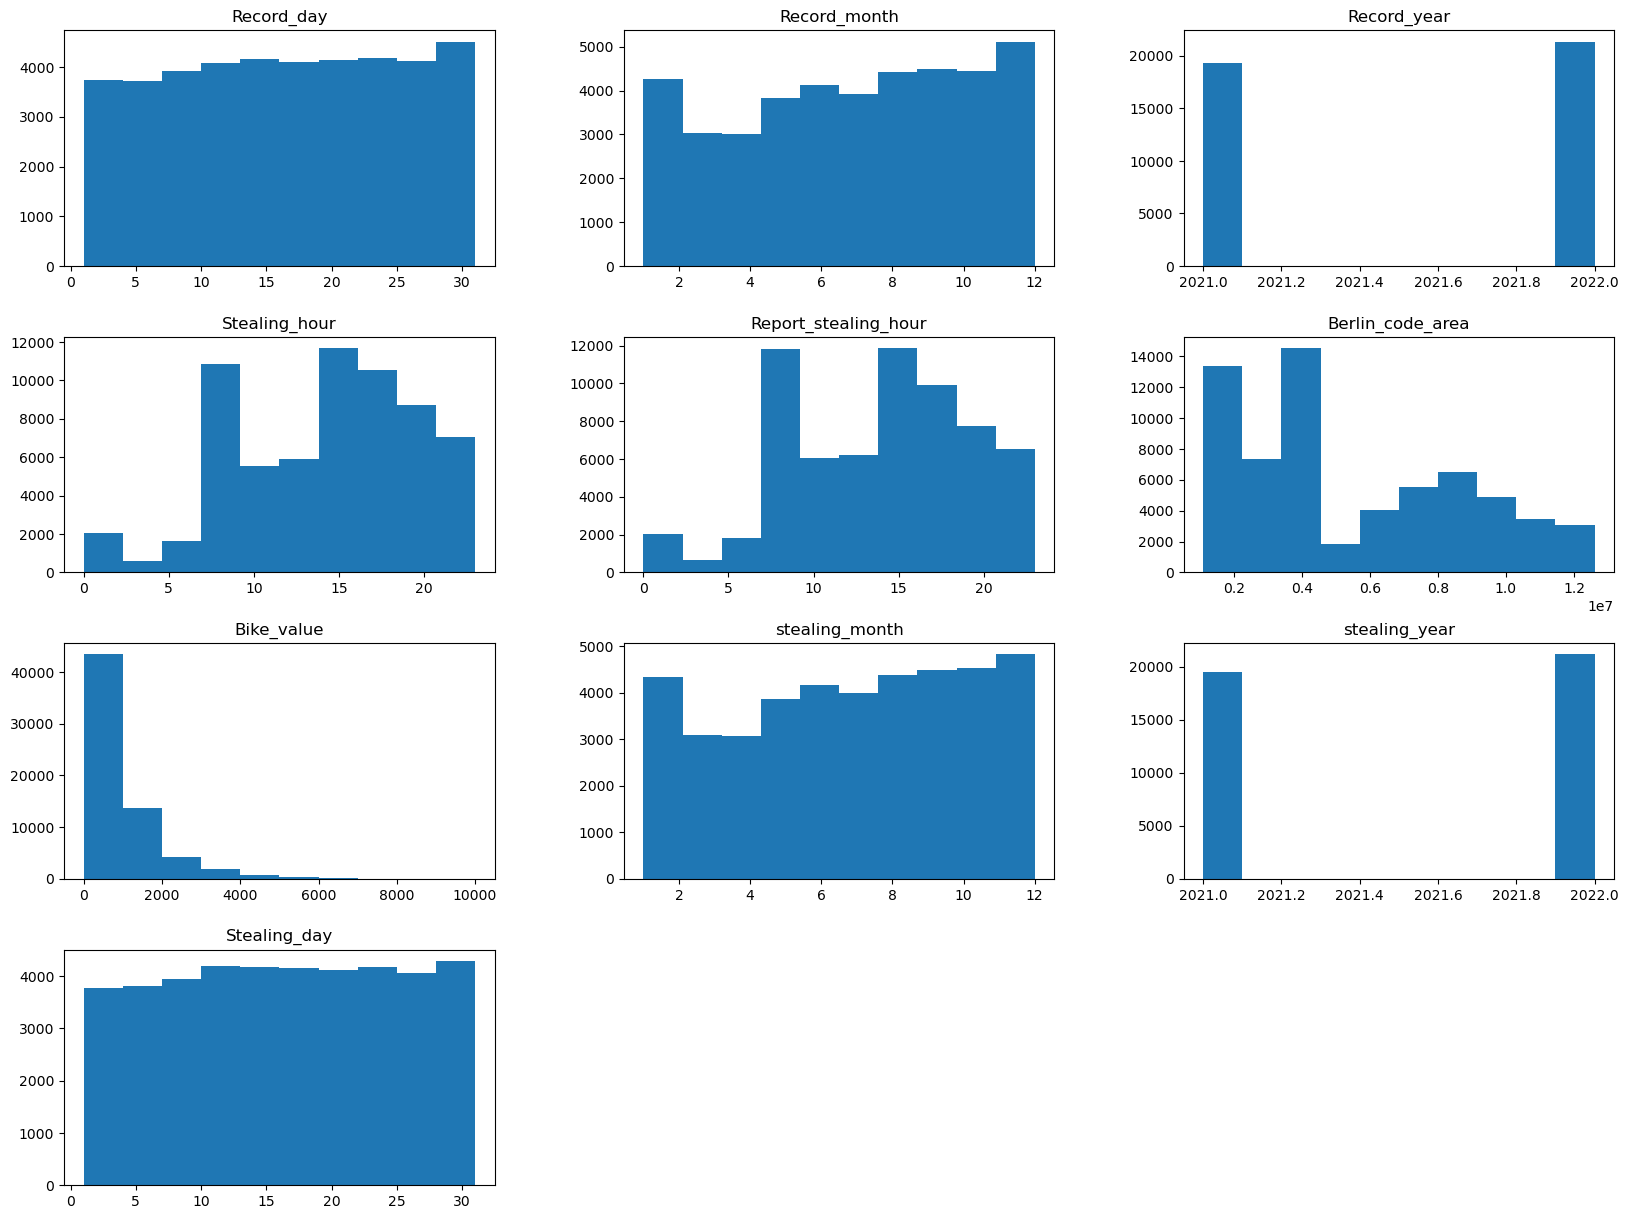

In [95]:
num_data.hist(figsize=(20,15), grid=False)
plt.show()

In [97]:
corr = num_data.corr()

<AxesSubplot:>

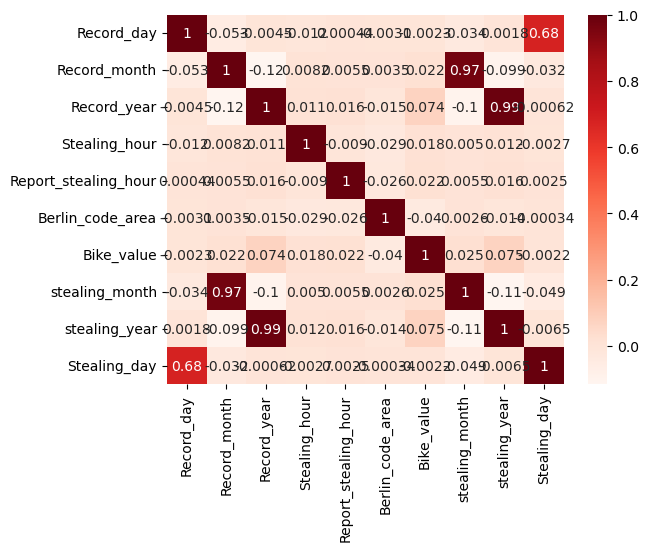

In [98]:
sns.heatmap(corr, cmap="Reds", xticklabels=corr.columns, yticklabels=corr.columns, annot=True)